# Intro to Keras

### Import modules

In [1]:
# Import modules
import os
import sys
import numpy as np
import pandas as pd
import random as rn

from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

print('Python working path: {}'.format(sys.executable))

Python working path: /Users/apartin/anaconda/envs/py35_tf14/bin/python


In [2]:
# Import DL modules
import tensorflow as tf
import keras
print('TensorFlow version: {}'.format(tf.__version__))
print('Keras version: {}'.format(keras.__version__))

TensorFlow version: 1.4.0
Keras version: 2.1.2


Using TensorFlow backend.


In [3]:
# Import Keras methods
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import optimizers, losses, regularizers
from keras import callbacks
from keras.utils import to_categorical
from keras.datasets import mnist, fashion_mnist, boston_housing

In [4]:
seed = 2018
np.random.seed(seed)
rn.seed(seed)

## 1. Create a fully-connected network for MNIST

### TODO: discuss the MNIST dataset (add ref)

### TODO: add schematic of the fully-connected classifier

In [5]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print('train_images: {}, {}'.format(train_images.shape, train_images.dtype))
print('test_images:  {}, {}'.format(test_images.shape, test_images.dtype))
print('train_labels: {}, {}'.format(train_labels.shape, train_labels.dtype))
print('test_labels:  {}, {}'.format(test_labels.shape, test_labels.dtype))

train_images: (60000, 28, 28), uint8
test_images:  (10000, 28, 28), uint8
train_labels: (60000,), uint8
test_labels:  (10000,), uint8


In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
def show_mnist_images(images, labels=None, n_images=4):
    """Plot random mnist images."""
    assert n_images <= 5, 'Can show up to 5 images.' 
    inds = np.random.randint(low=0, high=len(images), size=n_images)
    f, ax = plt.subplots(1, n_images)
    for i, im_id in enumerate(inds):
        ax[i].imshow(images[im_id], cmap='gray')  # cmap=plt.cm.binary
        if labels[im_id] is not None:
            ax[i].set_title('Label {}'.format(labels[im_id]))

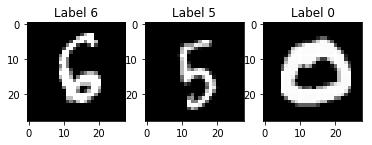

In [9]:
show_mnist_images(images=train_images, labels=train_labels, n_images=3)

In [10]:
# show_mnist_images??

In [11]:
# Reshape images for fully-connected input layer
train_images = train_images.reshape((60000, 28 * 28))  # or reshape((-1, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))  # or reshape((-1, 28 * 28))

In [12]:
# Split training data into training and validation data
val_size = 0.2
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels,
                                                                      test_size=val_size, random_state=seed,
                                                                      shuffle=True)

In [13]:
# One-hot encode the target variable
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [14]:
# Print dataset after reshape
print('train_images: {}, {}'.format(train_images.shape, train_images.dtype))
print('val_images:   {}, {}'.format(val_images.shape, val_images.dtype))
print('test_images:  {}, {}'.format(test_images.shape, test_images.dtype))
print('train_labels: {}, {}'.format(train_labels.shape, train_labels.dtype))
print('val_labels:   {}, {}'.format(val_labels.shape, val_labels.dtype))
print('test_labels:  {}, {}'.format(test_labels.shape, test_labels.dtype))

train_images: (48000, 784), uint8
val_images:   (12000, 784), uint8
test_images:  (10000, 784), uint8
train_labels: (48000, 10), float64
val_labels:   (12000, 10), float64
test_labels:  (10000, 10), float64


In [15]:
# Pre-process the data (convert to float and scale)
train_images = train_images.astype('float32') / 255
val_images = val_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [16]:
def create_mnist_classifier(activation='relu'):
    """Create an MNIST classier."""
    model = Sequential()
    model.add(Dense(units=128, activation=activation, input_shape=(28 * 28,)))
    model.add(Dense(units=128, activation=activation))
    model.add(Dense(units=10, activation='softmax'))
    return model

In [17]:
model = create_mnist_classifier(activation='relu')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),  # or 'rmsprop'
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train the model
history = model.fit(x = train_images,
                    y = train_labels,
                    batch_size = 128,
                    epochs = 5,
                    validation_data = (val_images, val_labels),
                    shuffle = True)  # randomly shuffles the training data for every new epoch

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.3379 - acc: 0.9031 - val_loss: 0.1821 - val_acc: 0.9462
Epoch 2/5
48000/48000 [==============================] - 2s 32us/step - loss: 0.1447 - acc: 0.9567 - val_loss: 0.1216 - val_acc: 0.9633
Epoch 3/5
48000/48000 [==============================] - 2s 32us/step - loss: 0.0992 - acc: 0.9694 - val_loss: 0.1025 - val_acc: 0.9702
Epoch 4/5
48000/48000 [==============================] - 2s 32us/step - loss: 0.0751 - acc: 0.9765 - val_loss: 0.0891 - val_acc: 0.9738
Epoch 5/5
48000/48000 [==============================] - 2s 33us/step - loss: 0.0596 - acc: 0.9814 - val_loss: 0.0777 - val_acc: 0.9768


In [20]:
# Evaluate the model on training data
train_loss, train_acc = model.evaluate(x=train_images, y=train_labels)
print('train_loss: {}'.format(train_loss))
print('train_acc: {}'.format(train_acc))

48000/48000 [==============================] - 1s 31us/step
train_loss: 0.03865979327719348
train_acc: 0.9890625


In [21]:
# Evaluate the model on val data
val_loss, val_acc = model.evaluate(x=val_images, y=val_labels)
print('val_loss: {}'.format(val_loss))
print('val_acc: {}'.format(val_acc))

12000/12000 [==============================] - 0s 34us/step
val_loss: 0.07767583593136321
val_acc: 0.9768333333333333


Take a look at the following metrics:
- Training metrics (`loss` and `acc`) and the validation metrics (`val_loss` and `val_acc`) printed at the last training epoch
- Training metrics (`train_loss` and `train_acc`) and the validation metrics (`val_loss` and `val_acc`) computed using the `evaluate` method after the training has been completed
<br/>

Notice that the validation values do match, while the training values do not match. The reason is that `val_loss` and `val_acc` are computed using the most updated neural network model at the end of every epoch. On the other hand, `loss` and `acc` (i.e., loss and acc for the training set) are the average values across all the batches for a given epoch. 

In [22]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)
print('test_loss: {}'.format(test_loss))
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 0s 34us/step
test_loss: 0.08130693901595659
test_acc: 0.9733


In [23]:
history.history.keys()

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])

In [24]:
def plot_training(history):
    epochs = np.asarray(history.epoch) + 1
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(epochs, loss, 'bo', label='loss')
    plt.plot(epochs, val_loss, 'ro', label='val_loss')
    plt.grid('on')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.xlim(0, len(epochs)+1)
    plt.ylim(0.0, 0.5)

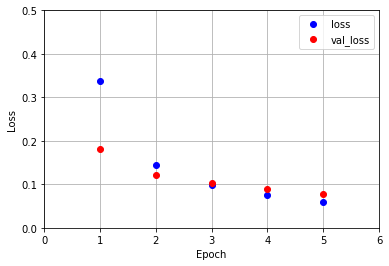

In [25]:
plot_training(history)

## 2. Callbacks

Keras callbacks: https://keras.io/callbacks/

In [26]:
model = create_mnist_classifier(activation='relu')

model.compile(optimizer=optimizers.RMSprop(lr=0.001),  # or 'rmsprop'
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# filepath = os.path.join(model_ckpt, 'model-{epoch:03d}-{val_loss:.2f}.hdf5')
# filepath = os.path.join(model_ckpt, 'best_weights.h5')  # save best model

callbacks_list = [
#     callbacks.EarlyStopping(monitor = 'val_loss',
#                             min_delta = 0.001,
#                             patience = 1),

#     callbacks.ModelCheckpoint(filepath = filepath,
#                               monitor = 'val_loss',
#                               save_best_only = True,
#                               period = 1),
    
    # TODO: show visulization of bouncing minima due to the high learning rate
    callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                factor = 0.1,
                                patience = 1,
                                verbose = 1),
    
    callbacks.CSVLogger(filename='training.log', separator=',', append=False)
]


In [28]:
# Train the model
history = model.fit(x = train_images,
                    y = train_labels,
                    batch_size = 128,
                    epochs = 12,
                    validation_data = (val_images, val_labels),
                    callbacks = callbacks_list,
                    shuffle = True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 2s 39us/step - loss: 0.3368 - acc: 0.9038 - val_loss: 0.1764 - val_acc: 0.9488
Epoch 2/12
48000/48000 [==============================] - 2s 32us/step - loss: 0.1458 - acc: 0.9562 - val_loss: 0.1233 - val_acc: 0.9632
Epoch 3/12
48000/48000 [==============================] - 2s 32us/step - loss: 0.0996 - acc: 0.9694 - val_loss: 0.1048 - val_acc: 0.9691
Epoch 4/12
48000/48000 [==============================] - 2s 33us/step - loss: 0.0737 - acc: 0.9772 - val_loss: 0.0946 - val_acc: 0.9720
Epoch 5/12
48000/48000 [==============================] - 2s 32us/step - loss: 0.0587 - acc: 0.9813 - val_loss: 0.0869 - val_acc: 0.9751
Epoch 6/12
48000/48000 [==============================] - 2s 33us/step - loss: 0.0460 - acc: 0.9854 - val_loss: 0.0865 - val_acc: 0.9755
Epoch 7/12
48000/48000 [==============================] - 2s 33us/step - loss: 0.0380 - acc: 0.9882 - val_loss: 0.0823 - val_acc

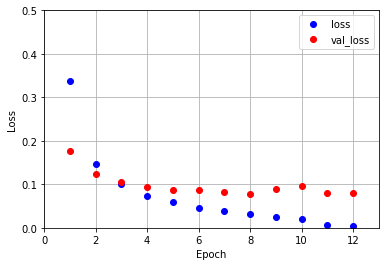

In [29]:
plot_training(history)

## 3. Saving and restoring a trained model

https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

In [30]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)
print('test_loss: {}'.format(test_loss))
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 0s 36us/step
test_loss: 0.07756027318653978
test_acc: 0.9807


In [31]:
model_name = 'my_model.h5'
model.save(model_name)

In [32]:
del model
# try:
#     model.summary()
# except ValueError:
#     'model does not exist.'

In [33]:
if os.path.exists(model_name):
    model = load_model('my_model.h5')
else:
    'model was not found.'

In [34]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)
print('test_loss: {}'.format(test_loss))
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 0s 41us/step
test_loss: 0.07756027318653978
test_acc: 0.9807


In [35]:
# Note that training.log is overwritten
# Note that there is no need to compile the model
history = model.fit(x = train_images,
                    y = train_labels,
                    batch_size = 128,
                    epochs = 2,
                    validation_data = (val_images, val_labels),
                    callbacks = callbacks_list,
                    shuffle = True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - ETA: 0s - loss: 0.0050 - acc: 0.999 - 2s 34us/step - loss: 0.0050 - acc: 0.9990 - val_loss: 0.0791 - val_acc: 0.9819
Epoch 2/2
48000/48000 [==============================] - 2s 33us/step - loss: 0.0050 - acc: 0.9990 - val_loss: 0.0791 - val_acc: 0.9820


In [36]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)
print('test_loss: {}'.format(test_loss))
print('test_acc: {}'.format(test_acc))
# plot_training(history)

10000/10000 [==============================] - 0s 36us/step
test_loss: 0.07759430408107036
test_acc: 0.9806


## 4. Batch-normalization (batch-norm)

TODO: add batchnorm explanation

In [37]:
model = Sequential()
model.add(Dense(units=64, activation=None, input_shape=(28*28,)))
model.add(Activation('relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(x=train_images, y=train_labels,
                    batch_size=128, epochs=2, shuffle=True,
                    validation_data=(val_images, val_labels))

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 1s 29us/step - loss: 0.4351 - acc: 0.8832 - val_loss: 0.2528 - val_acc: 0.9303
Epoch 2/2
48000/48000 [==============================] - 1s 24us/step - loss: 0.2186 - acc: 0.9376 - val_loss: 0.1880 - val_acc: 0.9448


In [39]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)
print('test_loss: {}'.format(test_loss))
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 0s 32us/step
test_loss: 0.1845684148401022
test_acc: 0.9452


In [40]:
model_btch = Sequential()
model_btch.add(Dense(units=64, activation=None, input_shape=(28*28,)))
model_btch.add(BatchNormalization())
model_btch.add(Activation('relu'))
model_btch.add(Dense(units=10, activation='softmax'))

model_btch.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model_btch.fit(x=train_images, y=train_labels,
                         batch_size=128, epochs=2, shuffle=True,
                         validation_data=(val_images, val_labels))

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 2s 39us/step - loss: 0.3747 - acc: 0.9031 - val_loss: 0.1987 - val_acc: 0.9442
Epoch 2/2
48000/48000 [==============================] - 1s 28us/step - loss: 0.1749 - acc: 0.9515 - val_loss: 0.1488 - val_acc: 0.9572


In [42]:
test_loss, test_acc = model_btch.evaluate(x=test_images, y=test_labels)
print('test_loss: {}'.format(test_loss))
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 0s 37us/step
test_loss: 0.14679380712583662
test_acc: 0.9568


## 5. Regularization

Optimization vs generalization.
<br>

Fight overfitting:
- Get more data
- Reduce the complexity of the network
- Regularization methods


In [43]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(x=train_images, y=train_labels, batch_size=128,
                    epochs=10, shuffle=True, verbose=0,
                    validation_data=(val_images, val_labels))

In [45]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)
print('test_loss: {}'.format(test_loss))
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 1s 66us/step
test_loss: 0.12757095835194168
test_acc: 0.977


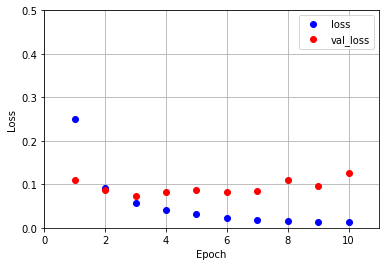

In [46]:
plot_training(history)

Add dropout

In [47]:
model = Sequential()
# model.add(Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(28*28,)))
# model.add(Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.35))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(x=train_images, y=train_labels, batch_size=128,
                    epochs=10, shuffle=True, verbose=0,
                    validation_data=(val_images, val_labels))

In [49]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)
print('test_loss: {}'.format(test_loss))
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 1s 66us/step
test_loss: 0.0848513591782903
test_acc: 0.9817


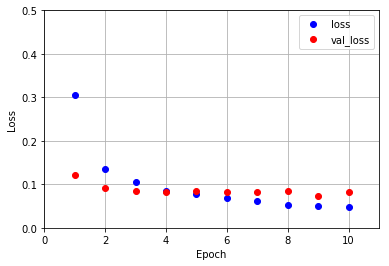

In [50]:
plot_training(history)